In [ ]:
from email.mime.multipart import MIMEMultipart # 一封邮件
from email.mime.text import MIMEText # 邮件内容
from email.mime.image import MIMEImage # 图片
from email.mime.application import MIMEApplication # 附件
import smtplib # 发送功能

### 准备发送邮件的参数

In [ ]:
# 发件人
sender = "pyesdfsend@163.com"
# 发送对象
to_list = [
    '11894605@qq.com'
]
# 抄送对象
cc_list = [] 
# 主题
subject = '今天天气不错'
# 授权码 链接SMTP服务器
license_code = 'IESOsfdsHRWHP'


### 创建空白邮件

In [ ]:
em = MIMEMultipart() # 一封邮件 （其实就是message.Message对象的一个子类）
em['Subject'] = subject # 邮件主题
em['From'] = sender # 发件人
em['To'] = ','.join(to_list) # 发送对象
em['Cc'] = ','.join(cc_list) # 抄送对象

# 邮件的正文
### 1.纯文本的邮件

In [ ]:
text = '第一次做邮件的测试'
content = MIMEText(text) # 把普通文字转换为邮件正文
em.attach(content) # 把邮件的正文丢给邮件的主体

### 2.带图片的邮件

### 3.html代码邮件

### 4.附件

In [ ]:
app = MIMEApplication(open('测试文件.txt', mode='rb').read()) # 把文件读进来
app.add_header("content-disposition", "attachment", filename="可爱老方.txt") # 给文件重新命一个下载名
em.attach(app)

### 发送邮件
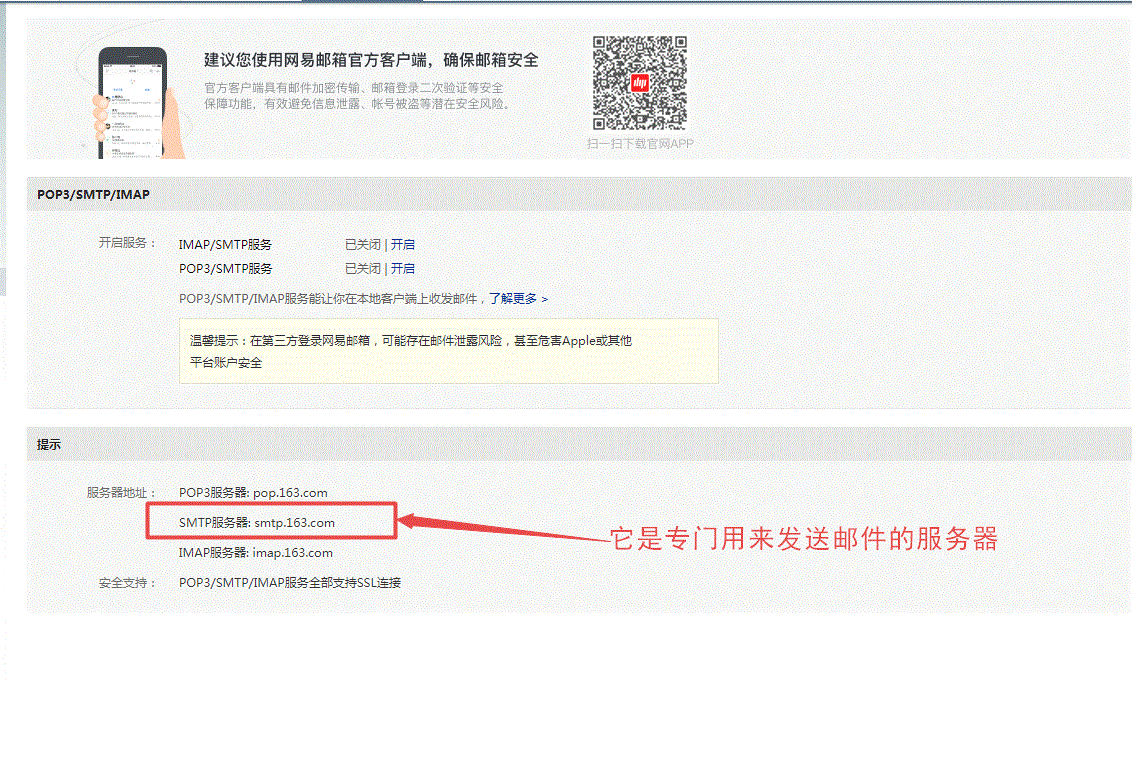
1. 先链接上SMTP服务器

In [ ]:
smtp = smtplib.SMTP() # 先创建一个SMTP对象
smtp.connect('smtp.163.com') # 连上对应的服务器

2. 登录

In [ ]:
smtp.login(sender, license_code)

3. 发送邮件

In [ ]:
# 1.send_message()的参数必须是message.Message类型的东西
# 2.只需给em一个参数就可以了，其他的参数包含在em中
smtp.send_message(em)

# smtp.sendmail() # sendmail()的参数必须是字符串

4. 关闭连接

In [ ]:
smtp.close()

# 封装为函数